In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
#reading data from local drive 
netflix = pd.read_csv("netflix_titles.csv")

#inspecting dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#inspecting data further
netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#counting null values for each column
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
#counting total null values across entire dataset
netflix.isnull().sum().sum()

4307

In [6]:
#replacing null values with a missing category
netflix['director'].fillna("Director Unavailable", inplace=True)
netflix['cast'].fillna("Cast Unavailable", inplace=True)
netflix['country'].fillna("Country Unavailable", inplace=True)
netflix.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [7]:
#checking to see if dataset has anymore null values remaining
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

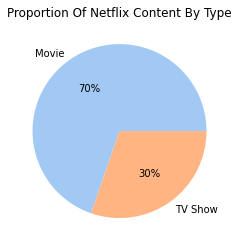

In [8]:
plt.title('Proportion Of Netflix Content By Type')
colors = sns.color_palette('pastel')
plt.pie(netflix['type'].value_counts(), labels = netflix['type'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.show()

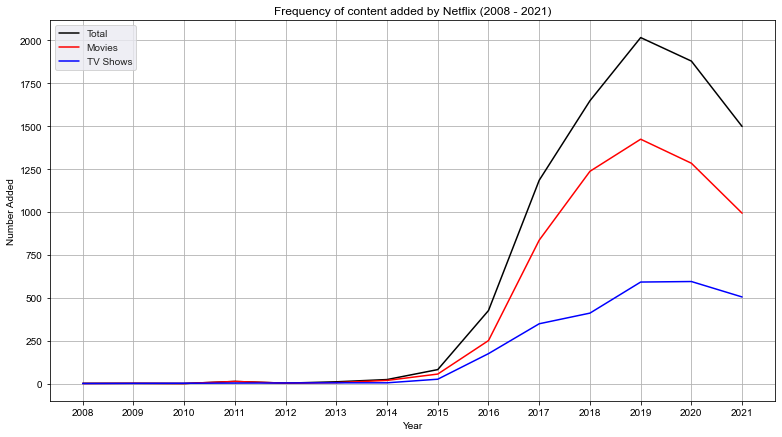

In [9]:
#Creating Year Added column based on Date Added
netflix['year_added'] = pd.DatetimeIndex(netflix['date_added']).year
netflix['year_added'].apply(lambda x: int(x))

#temp dataframes to use for plots
netflix_total_df = netflix.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_movies_df = netflix[netflix['type']=="Movie"].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_tv_df = netflix[netflix['type']=="TV Show"].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

fig, ax = plt.subplots(figsize=(13, 7))
plt.title("Frequency of content added by Netflix (2008 - 2021)")
plt.xlabel("Year")
plt.ylabel("Number Added")
ax.set_xticks(np.arange(2008, 2022, 1))
sns.set_style("dark")
sns.lineplot(data=netflix_total_df, x="year", y="count", color="black")
sns.lineplot(data=netflix_movies_df, x = "year", y="count", color="red")
sns.lineplot(data=netflix_tv_df, x = "year", y="count", color="blue")
plt.legend(['Total', 'Movies', "TV Shows"])
plt.grid()
plt.show()

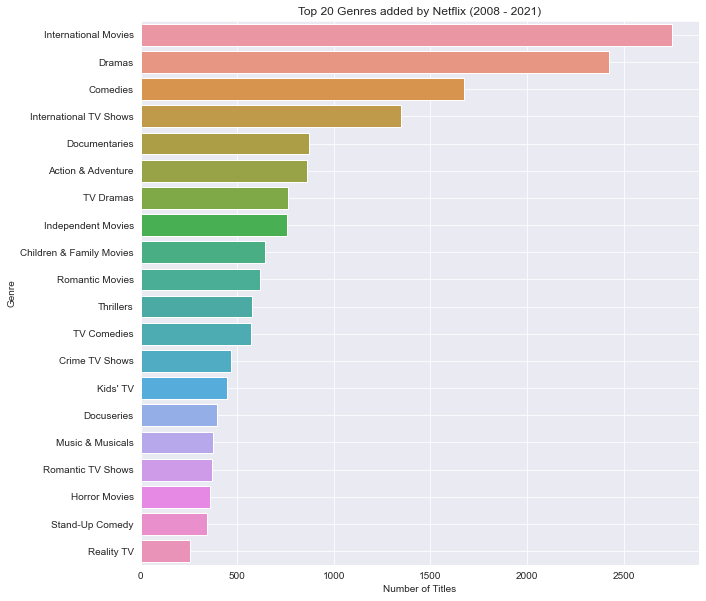

In [10]:
#creating a temp dataframe containing all titles, genres and year added
genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_df = pd.DataFrame()
genres_df['genre'] = genres
years = netflix.set_index('title').year_added
description = netflix.set_index('title').description
a = pd.merge(genres_df, years, left_index=True, right_index=True)
temp = pd.merge(a, description, left_index=True, right_index=True)

plt.figure(figsize=(10, 10))
sns.countplot(y = 'genre', data = temp, order=temp.genre.value_counts().iloc[:20].index)
plt.title('Top 20 Genres added by Netflix (2008 - 2021)')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid()
plt.show()


In [11]:
#temp dataframes to use for line plots
international_movies_df = temp[temp['genre']=='International Movies'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
dramas_df = temp[temp['genre']=='Dramas'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
comedies_df = temp[temp['genre']=='Comedies'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
international_tv_df = temp[temp['genre']=='International TV Shows'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
documentaries_df = temp[temp['genre']=='Documentaries'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})


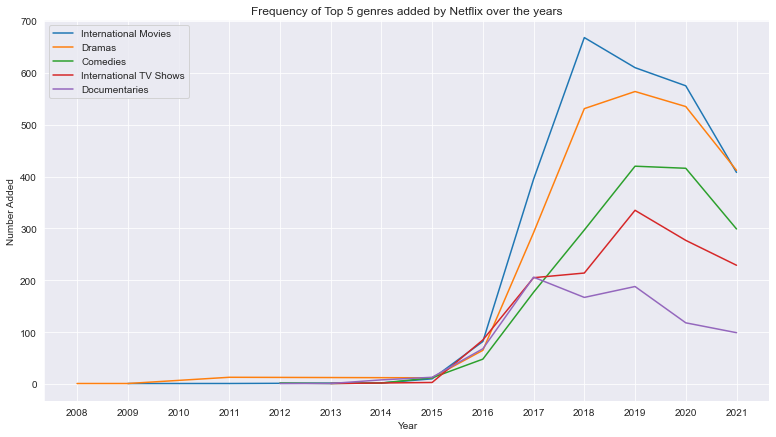

In [12]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title("Frequency of Top 5 genres added by Netflix over the years")
plt.xlabel("Year")
plt.ylabel("Number Added")
ax.set_xticks(np.arange(2008, 2022, 1))
sns.lineplot(data=international_movies_df, x="year", y="count")
sns.lineplot(data=dramas_df, x="year", y="count")
sns.lineplot(data=comedies_df, x="year", y="count")
sns.lineplot(data=international_tv_df, x="year", y="count")
sns.lineplot(data=documentaries_df, x="year", y="count")
plt.legend(['International Movies', 'Dramas', "Comedies", "International TV Shows", "Documentaries"])
plt.grid()
plt.show()


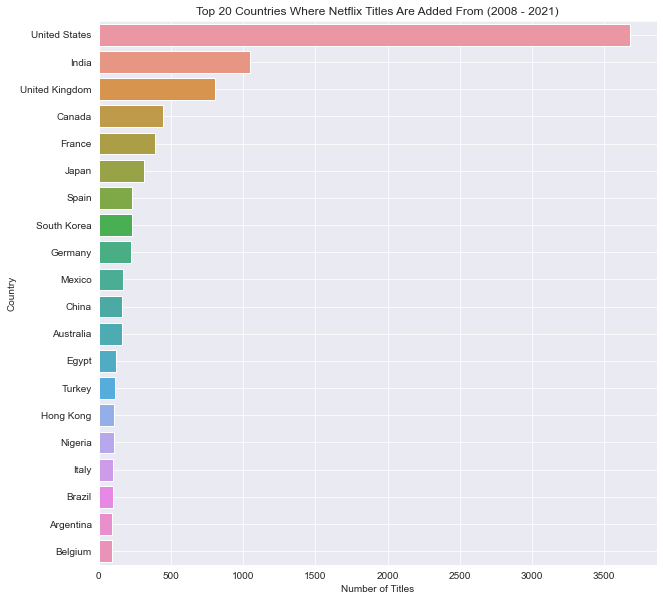

In [13]:
countries_df = netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries_df = countries_df[countries_df != 'Country Unavailable']
plt.figure(figsize=(10,10))
g = sns.countplot(y = countries_df, order=countries_df.value_counts().index[:20])
plt.title('Top 20 Countries Where Netflix Titles Are Added From (2008 - 2021)')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid()
plt.show()